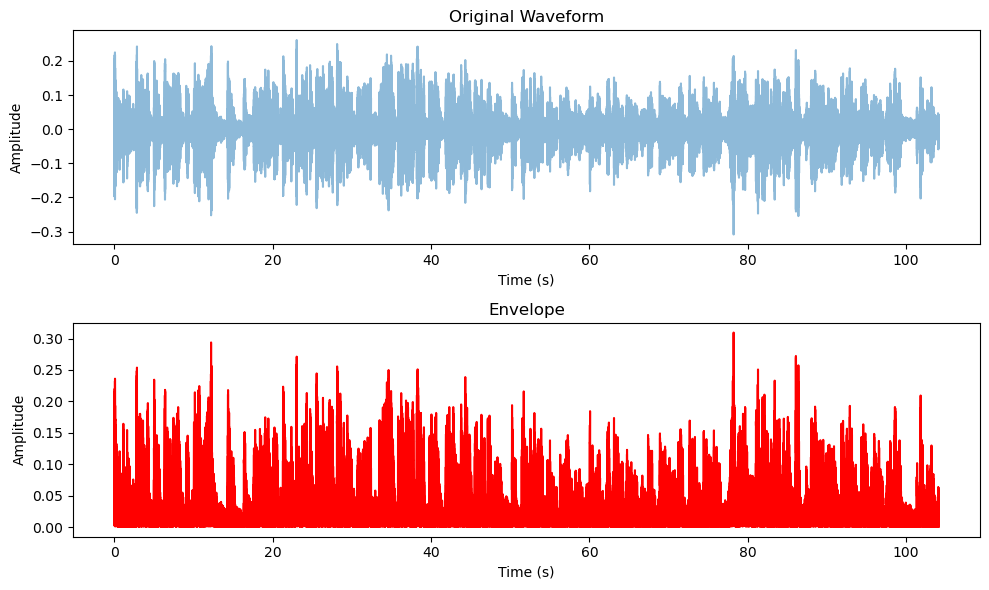

In [15]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import hilbert, filtfilt

audio_path = 'test.mp3'
y, sr = librosa.load(audio_path)

analytic_signal = hilbert(y)

envelope = np.abs(analytic_signal)

time = np.arange(0, len(y)) / sr

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(time, y, alpha=0.5)
plt.title('Original Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(time, envelope, color='red')
plt.title('Envelope')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

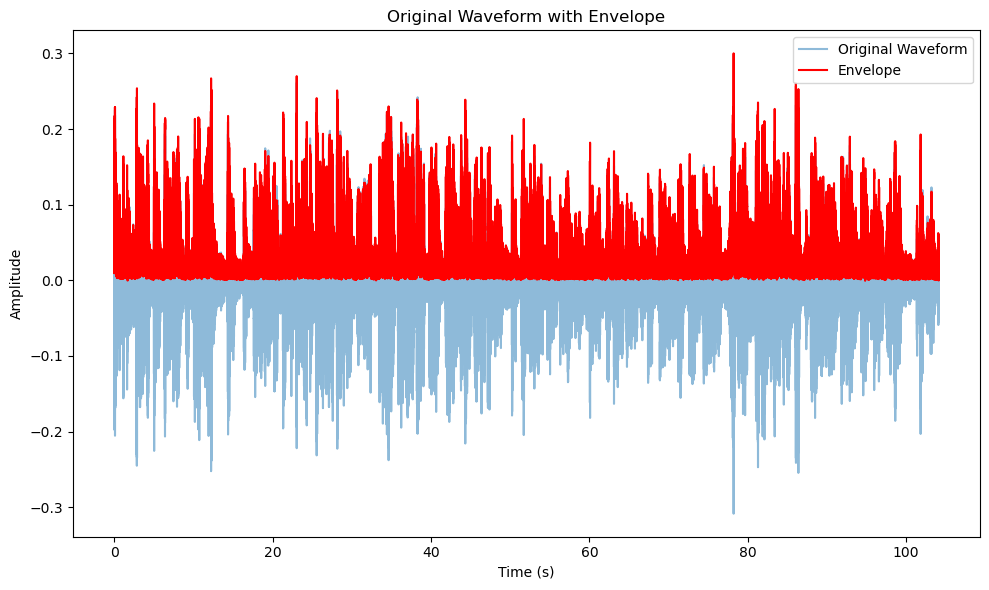

In [19]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import hilbert, butter, filtfilt

# Load the audio file
audio_path = 'test.mp3'
y, sr = librosa.load(audio_path)

# Calculate the analytic signal using the Hilbert transform
analytic_signal = hilbert(y)

# Calculate the envelope as the magnitude of the analytic signal
envelope = np.abs(analytic_signal)

# Set up a low-pass Butterworth filter
order = 5  # Filter order
cutoff_frequency = 1000  # Adjust cutoff frequency as needed
b, a = butter(order, cutoff_frequency, 'low', fs=sr)

# Apply the filter using filtfilt
smoothed_envelope = filtfilt(b, a, envelope)

# Create a time array
time = np.arange(0, len(y)) / sr

# Plot the original waveform
plt.figure(figsize=(10, 6))
plt.plot(time, y, alpha=0.5, label='Original Waveform')

# Plot the smoothed envelope over the waveform as a line curve
plt.plot(time, smoothed_envelope, color='red', label='Envelope')

plt.title('Original Waveform with Envelope')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()  # Show legend

plt.tight_layout()
plt.show()



22050


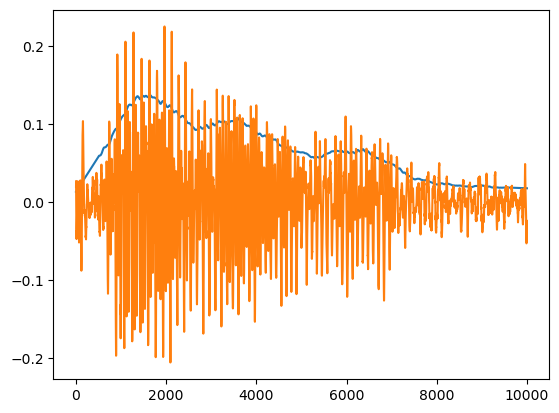

In [42]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import hilbert, butter, filtfilt, find_peaks, savgol_filter
from scipy.interpolate import interp1d

# Load the audio file
audio_path = 'test.mp3'
y, sr = librosa.load(audio_path)

print(sr)

# Calculate the analytic signal using the Hilbert transform
analytic_signal = hilbert(y)

env = np.abs(analytic_signal[:10000])

env = savgol_filter(env, 1000, 1)
plt.plot(env)
plt.plot(y[:10000])

# # Create a time array
# time = np.arange(0, len(y)) / sr

# # Plot the original waveform
# plt.figure(figsize=(10, 6))
# plt.plot(time, y, alpha=0.5, label='Original Waveform')

# # Plot the smoothed envelope over the peaks
# plt.plot(time, analytic_signal, color='red', label='Envelope')

# plt.title('Original Waveform with Smoothed Envelope Peaks')
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')
# plt.legend()

# plt.tight_layout()
# plt.show()